In [77]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_countries = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries.index = df_countries["Country_Region"]
df_countries = df_countries.drop(['Country_Region'], axis=1)

                        Country_Region  Confirmed  Deaths  Recovered   Active  \
Country_Region                                                                  
Australia                    Australia     7302.0   102.0     6812.0    388.0   
Austria                        Austria    17078.0   677.0    16012.0    389.0   
Canada                          Canada    99595.0  8125.0    59034.0  32437.0   
China                            China    84228.0  4638.0    79472.0    118.0   
Denmark                        Denmark    12299.0   594.0    11193.0    512.0   
...                                ...        ...     ...        ...      ...   
West Bank and Gaza  West Bank and Gaza      489.0     3.0      414.0     72.0   
Western Sahara          Western Sahara        9.0     1.0        6.0      2.0   
Yemen                            Yemen      632.0   139.0       28.0    465.0   
Zambia                          Zambia     1321.0    10.0     1104.0    207.0   
Zimbabwe                    

In [298]:
df_t = pd.DataFrame(pd.to_numeric(df_countries.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])



,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
0,7669872,426185,3640188,3528995,29619.53,5.56


In [48]:
df_countries["Mortality Rate (per 100)"] = np.round(100*df_countries["Deaths"]/df_countries["Confirmed"],2)
df_countries.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Greys',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrRd',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])



,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
Country_Region,,,,,,
US,2048986,114669,547386,1312426,621.91,5.60
Brazil,828810,41828,445123,341859,389.92,5.05
Russia,519458,6819,274128,238511,355.95,1.31
India,308916,8884,154303,145729,22.39,2.88
United Kingdom,294402,41566,1282,251554,433.67,14.12
Spain,243209,27136,150376,65697,520.18,11.16
Italy,236305,34223,173085,28997,390.83,14.48
Peru,214788,6088,107133,101567,651.43,2.83
France,193220,29377,72695,91148,296.02,15.20


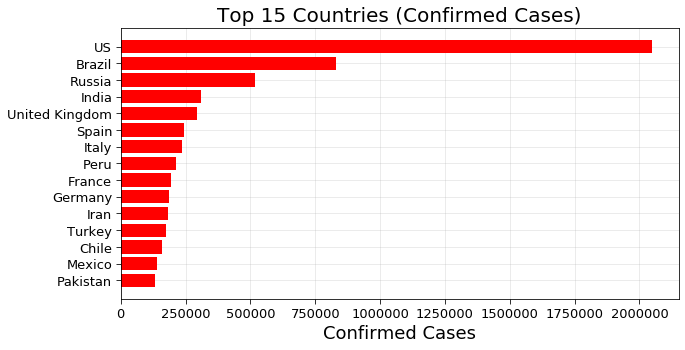

In [52]:
figure_confirmed = plt.figure(figsize=(10,5))
figure_confirmed.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Confirmed')["Confirmed"].index[-15:],df_countries.sort_values('Confirmed')["Confirmed"].values[-15:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 15 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

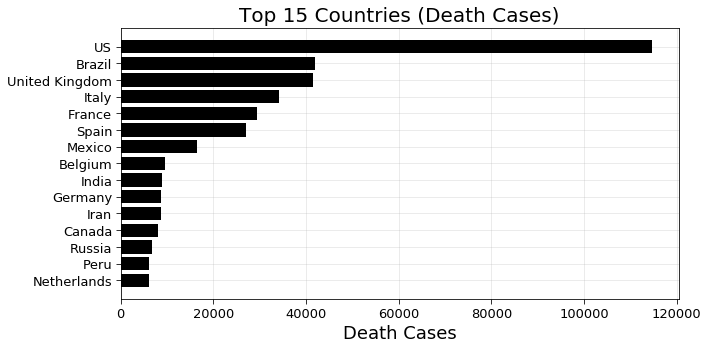

In [54]:
figure_deaths = plt.figure(figsize=(10,5))
figure_deaths.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Deaths')["Deaths"].index[-15:],df_countries.sort_values('Deaths')["Deaths"].values[-15:],color="black")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Death Cases",fontsize=18)
plt.title("Top 15 Countries (Death Cases)",fontsize=20)
plt.grid(alpha=0.3)

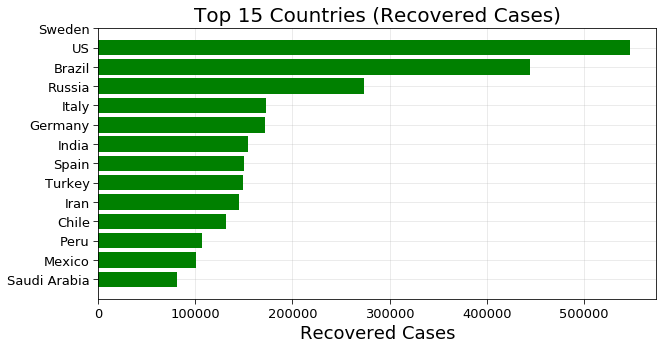

In [57]:
figure_recovers = plt.figure(figsize=(10,5))
figure_recovers.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Recovered')["Recovered"].index[-15:],df_countries.sort_values('Recovered')["Recovered"].values[-15:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 15 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)

In [194]:
medical_rating = pd.read_csv("data/medical_system.csv")
medical_rating = medical_rating.copy().drop(['Health Distribution','Overall goal attainment', 'Health expenditure per capita in international dollars'],axis =1)

medical_rating.index = medical_rating["Country"]

medical_rating = medical_rating.drop(['Country'], axis=1)
medical_rating = medical_rating.sort_values('Health Level')

df_confirmed_cases = df_countries.sort_values('Confirmed', ascending= False)["Confirmed"].head(15)

confirmed_health_df = pd.merge(df_confirmed_cases, medical_rating, left_index=True, right_index=True)

confirmed_health_df.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Greens',subset=["Health Level"])\
                        .background_gradient(cmap='Greens',subset=["On level of health"])\
                        .background_gradient(cmap='Blues',subset=["Overall health system performance"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Health Level","On level of health","Overall health system performance"])

Country
China               1438207241
India               1377233523
US                   330610570
Indonesia            272931713
Pakistan             219992900
                       ...    
Montserrat                4991
Falkland Islands          3458
Niue                      1624
Tokelau                   1354
Holy See                   801
Name: Population, Length: 235, dtype: int64


,Confirmed,Health Level,On level of health,Overall health system performance
US,2048986,24,72,37
Brazil,828810,111,78,125
Russia,519458,91,127,130
India,308916,19,118,112
United Kingdom,294402,14,24,18
Spain,243209,5,6,7
Italy,236305,6,3,2
Peru,214788,105,119,129
France,193220,3,4,1
Germany,187263,22,41,25


In [295]:
population = pd.read_csv("data/population_by_country.csv")
population.index = population["Country"]
population = population["Population"]

df_confirmed_cases = df_countries.sort_values('Confirmed', ascending= False)

confirmed_population = pd.merge(df_confirmed_cases, population, left_index=True, right_index=True)

confirmed_population["% Confirmed"] = 100*confirmed_population["Confirmed"]/confirmed_population["Population"]
confirmed_population["% Active"] = 100*confirmed_population["Active"]/confirmed_population["Population"]
confirmed_population["% Recovered"] = 100*confirmed_population["Recovered"]/confirmed_population["Population"]
confirmed_population["% Deaths"] = 100*confirmed_population["Deaths"]/confirmed_population["Population"]

confirmed_population_top_countries = confirmed_population.copy().drop(['Confirmed','Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(25)

confirmed_population_top_countries.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Population,% Confirmed,% Active,% Recovered,% Deaths
US,330610570.000,0.620,0.397,0.166,0.035
Brazil,212253150.000,0.390,0.161,0.210,0.020
Russia,145922010.000,0.356,0.163,0.188,0.005
India,1377233523.000,0.022,0.011,0.011,0.001
United Kingdom,67814098.000,0.434,0.371,0.002,0.061
Spain,46751175.000,0.520,0.141,0.322,0.058
Italy,60479424.000,0.391,0.048,0.286,0.057
Peru,32876986.000,0.653,0.309,0.326,0.019
France,65244628.000,0.296,0.140,0.111,0.045
Germany,83730223.000,0.224,0.008,0.205,0.010


In [296]:
confirmed_population_by_confirmed = confirmed_population.copy().sort_values('% Confirmed', ascending=False).drop(['Confirmed', 'Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(15)

confirmed_population_by_confirmed.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Population,% Confirmed,% Active,% Recovered,% Deaths
Qatar,2870922.000,2.668,0.809,1.856,0.002
San Marino,33917.000,2.046,0.389,1.533,0.124
Holy See,801.000,1.498,0.000,1.498,0.000
Andorra,77240.000,1.104,0.027,1.011,0.066
Bahrain,1688629.000,1.049,0.325,0.722,0.002
Chile,19082804.000,0.843,0.139,0.688,0.015
Kuwait,4257495.000,0.821,0.226,0.588,0.007
Singapore,5840996.000,0.688,0.208,0.480,0.000
Peru,32876986.000,0.653,0.309,0.326,0.019
Luxembourg,623861.000,0.650,0.004,0.628,0.018


In [297]:
confirmed_population_by_deaths = confirmed_population.copy().sort_values('% Deaths', ascending=False).drop(['Confirmed','Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(15)

confirmed_population_by_deaths.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Population,% Confirmed,% Active,% Recovered,% Deaths
San Marino,33917.000,2.046,0.389,1.533,0.124
Belgium,11579477.000,0.517,0.291,0.143,0.083
Andorra,77240.000,1.104,0.027,1.011,0.066
United Kingdom,67814098.000,0.434,0.371,0.002,0.061
Spain,46751175.000,0.520,0.141,0.322,0.058
Italy,60479424.000,0.391,0.048,0.286,0.057
Sweden,10086531.000,0.493,0.444,nan,0.048
France,65244628.000,0.296,0.140,0.111,0.045
Netherlands,17127290.000,0.284,0.248,0.001,0.035
US,330610570.000,0.620,0.397,0.166,0.035
